# 機械学習フロー

## 事前準備

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from sklearn.ensemble import RandomForestClassifier

/Users/takamoriyuki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### テストデータの加工

In [19]:
testdf = pd.read_csv("application_test3.csv")

# 数値データを取り出す
testdf_number = testdf.select_dtypes(include='number')
#文字データの列を取り出す
testdf_str = testdf.select_dtypes(include=object)

#全ての文字データの数値化
temp = pd.Series(testdf_str.columns.values)
testdf_str_count = {}
testdf_str_label_number = {}
for i in temp:
    vc = testdf_str[i].value_counts()
    #print(vc)
    testdf_str_count[i] = vc
#print(df_str_count)

#辞書内のリストのキーを辞書化し、０、１とナンバリング
for j in testdf_str_count.keys():
    testdf_str_count[j]
    count = 0
    for key in testdf_str_count[j].keys():
        if key not in testdf_str_label_number:
            testdf_str_label_number[key] = count
            count += 1

#値を置き換え
testdf_str_number = testdf_str.replace(testdf_str_label_number)
#文字データの項目のナンバリングに成功

testdf_number_strnumber = pd.concat([testdf_str_number,testdf_number], axis=1)

# 欠損データは列毎の最頻値で埋める
testdf_delete_nan = testdf_number_strnumber.fillna(testdf_number_strnumber.mode().iloc[0])


In [26]:
testdata = testdf_delete_nan.drop(["SK_ID_CURR"],axis=1)

In [27]:
testdata.shape

(48744, 120)

0    282686
1     24825
Name: TARGET, dtype: int64


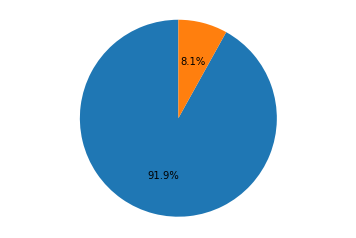

{'Cash loans': 0, 'Revolving loans': 1, 'F': 0, 'M': 1, 'XNA': 2, 'N': 0, 'Y': 1, 'Unaccompanied': 0, 'Family': 1, 'Spouse, partner': 2, 'Children': 3, 'Other_B': 4, 'Other_A': 5, 'Group of people': 6, 'Working': 0, 'Commercial associate': 1, 'Pensioner': 2, 'State servant': 3, 'Unemployed': 4, 'Student': 5, 'Businessman': 6, 'Maternity leave': 7, 'Secondary / secondary special': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Academic degree': 4, 'Married': 0, 'Single / not married': 1, 'Civil marriage': 2, 'Separated': 3, 'Widow': 4, 'Unknown': 5, 'House / apartment': 0, 'With parents': 1, 'Municipal apartment': 2, 'Rented apartment': 3, 'Office apartment': 4, 'Co-op apartment': 5, 'Laborers': 0, 'Sales staff': 1, 'Core staff': 2, 'Managers': 3, 'Drivers': 4, 'High skill tech staff': 5, 'Accountants': 6, 'Medicine staff': 7, 'Security staff': 8, 'Cooking staff': 9, 'Cleaning staff': 10, 'Private service staff': 11, 'Low-skill Laborers': 12, 'Waiters/barmen st

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv("application_train3.csv")

df.shape

column_null = df.isnull().sum()

#クラス毎のデータ数
target_count = df["TARGET"].value_counts()
print(target_count)


plt.pie(target_count, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

# デフォルトした人のデータを取り出してみる
target1 = df[df.TARGET == 1]
target0 = df[df.TARGET == 0]

# 欠損率をみる
target1_missing_ratio = target1.isnull().sum() / 24825 * 100
target0_missing_ratio = target0.isnull().sum() / 282686 * 100

# 欠損率の　デフォルト　ー　返済した人

missing_ratio_gap = target1_missing_ratio - target0_missing_ratio

# 欠損率の差が０でない値を取り出す
#(~~~MODE,MEDI,AVGは扱いがわからないが欠損していることに意味があるかも)

missing_ratio_gap_not0 = missing_ratio_gap[missing_ratio_gap != 0].sort_values(ascending=False)
missing_ratio_gap_not0[30:70]

# AMT_REQ_CREDIT_BUREAU_YEAR, OWN_CAR_AGE, 
# OCCUPATION_TYPE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE
#あたりが気になる

#文字データの列を取り出す
df_str = df.select_dtypes(include=object)

# 数字データの列を取り出す
df_number = df.select_dtypes(include='number')

# 数値データから〜〜〜MODE,MEDI,AVGを消す
temp = pd.Series(df_number.columns.values)

mode = temp[temp.str.contains('MODE')]
medi = temp[temp.str.contains('MEDI')]
avg = temp[temp.str.contains('AVG')]

delete_clumns = pd.concat([mode, medi, avg])

df_number_delete_MODE = df_number.drop(delete_clumns, axis=1)

#データまとめ

# 人数
number_people0 = 282686
number_people1 = 24825

#全体
df

#デフォルトしたか、しないか
target1 = df[df.TARGET == 1]
target0 = df[df.TARGET == 0]

#数値データの列
df_number = df.select_dtypes(include='number')
#数値データの中から~~~MODE,MEDI,AVGを除外したもの
df_number_delete_MODE

#文字データの列
df_str = df.select_dtypes(include=object)

#数値データの中でデフォルトしたか
target1_number = df_number[df_number.TARGET == 1]
target0_number = df_number[df_number.TARGET == 0]

#文字データの中でデフォルトしたか
target1_str = target1.select_dtypes(include=object)
target0_str = target0.select_dtypes(include=object)

# 数値データの相関係数
df_number_corr = df_number.corr()
corr_about_target = df_number_corr.TARGET.sort_values(ascending=False)

#全ての文字データの数値化に挑戦してみる

temp = pd.Series(df_str.columns.values)
df_str_count = {}
df_str_label_number = {}
for i in temp:
    vc = df_str[i].value_counts()
    #print(vc)
    df_str_count[i] = vc
#print(df_str_count)

#辞書内のリストのキーを辞書化し、０、１とナンバリング
for j in df_str_count.keys():
    df_str_count[j]
    count = 0
    for key in df_str_count[j].keys():
        if key not in df_str_label_number:
            df_str_label_number[key] = count
            count += 1

#値を置き換え
df_str_number = df_str.replace(df_str_label_number)

print(df_str_label_number)
#文字データの項目のナンバリングに成功
#ただ、この方法では、no,yesなどの、かぶった項目をユニークなものとしていない
#また、出現した順に数字を振るので、順序がある項目に順序をつけられない方法である

#TARGETと結合
df_str_numbers = pd.concat([df_str_number,df["TARGET"]], axis=1)

### 欠損率が高いのはデフォルトした人ではないか
### 欠損値からは
#AMT_REQ_CREDIT_BUREAU_YEAR, OWN_CAR_AGE, OCCUPATION_TYPE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE
### 相関係数が高いものは、
#DAYS_BIRTH, REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT, DAYS_LAST_PHONE_CHANGE, DAYS_ID_PUBLISH , REG_CITY_NOT_WORK_CITY
### 相関係数が低いものは、
#DAYS_EMPLOYED, AMT_GOODS_PRICE, REGION_POPULATION_RELATIVE, AMT_CREDIT, HOUR_APPR_PROCESS_START

In [3]:
df_number_strnumber = pd.concat([df_str_number,df_number], axis=1)
df_columns = df_number_strnumber.columns

# 欠損データは列毎の最頻値で埋める
df_delete_nan = df_number_strnumber.fillna(df_number_strnumber.mode().iloc[0])



In [4]:
df_delete_nan_X = df_delete_nan.drop(["SK_ID_CURR","TARGET"],axis=1)

X, y  = np.array(df_delete_nan_X), np.array(df_delete_nan["TARGET"])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
#ランダムフォレスト
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, y_test)

0.9198210151148573

In [7]:
auc(fpr, tpr)

0.5055613841369181

## 【問題1】クロスバリデーション

In [8]:
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=3)
rfc = RandomForestClassifier(random_state=0)
score_list = cross_val_score(rfc, X_train, y_train, cv=kfold, scoring = "roc_auc")

In [9]:
score_list.mean()

0.6244012726898256

## 【問題2】グリッドサーチ


In [12]:
 from sklearn.grid_search import GridSearchCV

 # use a full grid over all parameters
 param_grid = {"n_estimators":[10,20,30],
                           "criterion": ["gini", "entropy"]}

forest_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                 param_grid = param_grid,   
                 scoring="roc_auc",  #metrics
                 cv = 5,              #cross-validation
                    )  

In [13]:
forest_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [14]:
#ベストスコアを出したモデルを保存
best_rfc = forest_grid.best_estimator_

In [28]:
y_pred = best_rfc.predict_proba(testdata)

In [29]:
y_pred

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [0.93333333, 0.06666667],
       [0.76666667, 0.23333333]])

In [32]:
#提出ファイルを作る関数   

def submit_csv(y_pred,testdata):
    
    submission5 = y_pred

    list4 =[0, "TARGET"]

    submission4_df = pd.DataFrame(submission5,columns=list4)
    submission_file4 = pd.concat([testdata["SK_ID_CURR"], submission4_df["TARGET"]], axis=1) 

    return submission_file4

#submission_file4.to_csv("kaggle_homecredit", index=False)

In [34]:
submit_csv(y_pred,testdf_delete_nan).to_csv("kaggle_homecredit1", index=False)

提出したところ、<br>
AUC:0.67268<br>
となった。

## 【問題3】Kernelからの調査

In [ ]:
#　Kernel:Random Forest & K-Fold Cross Validationより

#　n_estimators=50で学習されていて、AUC：０.７３を達成している
#　n_estimatersが足りないようだ

# bootstrapもTrueにするべきかもしれない
#bootstrapとは
#ブートストラップサンプリングにより標本データ群から無作為に抽出されたデータ・特徴量から決定木を作成し、
#作成された決定木を多数決的に結合することで適切なモデルを生成するアルゴリズム。




"""
clf = RandomForestClassifier(
    n_estimators=50,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced'
)
"""

## 【問題4】高い汎化性能のモデル作成


### bootstrapをtrueにする


In [37]:
param_grid1 = {"n_estimators":[10,20,30],
                           "criterion": ["gini", "entropy"]}

forest_grid1 = GridSearchCV(estimator=RandomForestClassifier(bootstrap=True,random_state=0),
                 param_grid = param_grid1,   
                 scoring="roc_auc",  #metrics
                 cv = 5,              #cross-validation
                    )  

In [38]:
forest_grid1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [39]:
best_rfc1 = forest_grid1.best_estimator_

In [40]:
y_pred1 = best_rfc1.predict_proba(testdata)

In [41]:
submit_csv(y_pred1,testdf_delete_nan).to_csv("kaggle_homecredit2", index=False)

提出したところ、<br>
AUC:0.67268<br>
となり、変わらなかった。

### n_estimatorsを変更する

In [42]:
param_grid2 = {"n_estimators":[50,100],
                           "criterion": ["gini", "entropy"]}

forest_grid2 = GridSearchCV(estimator=RandomForestClassifier(bootstrap=True,random_state=0),
                 param_grid = param_grid2,   
                 scoring="roc_auc",  #metrics
                 cv = 5,              #cross-validation
                    )  

forest_grid2.fit(X_train,y_train)

best_rfc2 = forest_grid2.best_estimator_

y_pred2 = best_rfc2.predict_proba(testdata)

submit_csv(y_pred2,testdf_delete_nan).to_csv("kaggle_homecredit3", index=False)

提出したところ、<br>
AUC:0.70936<br>
となり、上昇した。

## 【問題5】最終的なモデルの選定

n_estimatorsをさらに増やしてみる。

In [44]:
param_grid3 = {"n_estimators":[150,200],
                           "criterion": ["gini", "entropy"]}

forest_grid3 = GridSearchCV(estimator=RandomForestClassifier(bootstrap=True,random_state=0),
                 param_grid = param_grid3,   
                 scoring="roc_auc",  #metrics
                 cv = 5,              #cross-validation
                    )  

forest_grid3.fit(X_train,y_train)

best_rfc3 = forest_grid3.best_estimator_

y_pred3 = best_rfc3.predict_proba(testdata)

submit_csv(y_pred3,testdf_delete_nan).to_csv("kaggle_homecredit4", index=False)

提出したところ、
AUC:0.71781
となり、上昇した。